<a href="https://colab.research.google.com/github/deepeshaburse/winter-of-contributing/blob/Datascience_With_Python/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/Amazon.csv")

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [10]:
train

,Date,Open,High,Low,Close,Volume
3803,25-06-2012,220.300003,221.589996,218.000000,220.070007,2382300
5627,25-09-2019,1747.359985,1773.000000,1723.000000,1768.329956,3493200
6062,17-06-2021,3403.179932,3497.199951,3401.000000,3489.239990,5136500
2046,05-07-2005,33.500000,34.480000,33.450001,34.080002,7383800
516,03-06-1999,56.968750,57.250000,52.250000,52.531250,17311600
...,...,...,...,...,...,...
1218,21-03-2002,14.620000,15.240000,14.560000,15.170000,5577900
5173,04-12-2017,1173.849976,1175.199951,1128.000000,1133.949951,5931900
1970,16-03-2005,33.880001,34.439999,33.599998,33.869999,5370000
1514,23-05-2003,33.029999,33.049999,32.470001,32.720001,7063200


In [5]:
training_set = train.iloc[:, 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60, 4924):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [13]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
152/152 [==============================] - 18s 86ms/step - loss: 0.0552
Epoch 2/100
152/152 [==============================] - 13s 87ms/step - loss: 0.0547
Epoch 3/100
152/152 [==============================] - 13s 86ms/step - loss: 0.0545
Epoch 4/100
152/152 [==============================] - 13s 86ms/step - loss: 0.0544
Epoch 5/100
152/152 [==============================] - 13s 87ms/step - loss: 0.0543
Epoch 6/100
152/152 [==============================] - 13s 87ms/step - loss: 0.0544
Epoch 7/100
152/152 [==============================] - 13s 86ms/step - loss: 0.0544
Epoch 8/100
152/152 [==============================] - 13s 86ms/step - loss: 0.0545
Epoch 9/100
152/152 [==============================] - 13s 87ms/step - loss: 0.0542
Epoch 10/100
152/152 [==============================] - 13s 88ms/step - loss: 0.0543
Epoch 11/100
152/152 [==============================] - 13s 87ms/step - loss: 0.0543
Epoch 12/100
152/152 [==============================] - 13s 87ms/step - lo

In [18]:
test

,Date,Open,High,Low,Close,Volume
927,18-01-2001,18.375000,19.500000,17.937500,19.500000,4115800
220,31-03-1998,7.114583,7.208333,6.979167,7.127604,6565200
4410,21-11-2014,335.420013,338.329987,331.470001,332.630005,4466600
729,05-04-2000,61.750000,64.937500,60.500000,62.187500,4900000
2594,07-09-2007,84.699997,84.970001,83.209999,84.519997,8231200
...,...,...,...,...,...,...
1251,08-05-2002,16.549999,17.459999,16.500000,17.320000,7888400
3568,20-07-2011,220.050003,220.199997,214.410004,215.550003,3372900
1503,08-05-2003,30.360001,30.760000,30.219999,30.450001,8513500
4152,13-11-2013,347.399994,356.220001,345.679993,356.220001,2773300


In [14]:
real_stock_price = test.iloc[:, 1:2].values

In [19]:
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1231):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

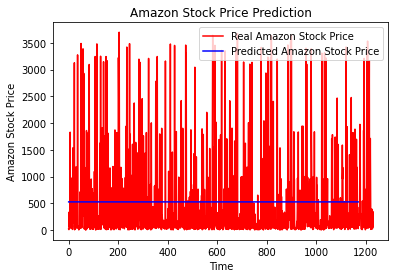

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()